#### Sprint 1 (Task 1 and Task 2)

In [2]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from sklearn.model_selection import train_test_split
from bs4 import BeautifulSoup
from nltk.corpus import stopwords 

In [3]:
df=pd.read_csv('final_amazon_electronics.csv')
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,22873041,R3ARRMDEGED8RD,B00KJWQIIC,335625766,Plemo 14-Inch Laptop Sleeve Case Waterproof Fa...,PC,5,0,0,N,Y,Pleasantly surprised,I was very surprised at the high quality of th...,2015-08-31,1
1,US,30088427,RQ28TSA020Y6J,B013ALA9LA,671157305,TP-Link OnHub AC1900 Wireless Wi-Fi Router,PC,5,24,31,N,N,OnHub is a pretty no nonsense type router that...,I am a Google employee and had to chance to us...,2015-08-31,1
2,US,38264512,R39NJY2YJ1JFSV,B00AQMTND2,964759214,Aleratec SATA Data Cable 2.0 20in Serial ATA S...,PC,5,0,0,N,Y,Five Stars,Excellent! Great value and does the job.,2015-08-31,1
3,US,30548466,R31SR7REWNX7CF,B00KX4TORI,170101802,Kingston Digital MobileLite G4 USB 3.0 Multi-F...,PC,5,0,0,N,Y,"Good quality, works well and compact","Good quality,works well and compact size",2015-08-31,1
4,US,49329488,R1QF6RS1PDLU18,B00TR05L9Y,778403103,"Lenovo TAB2 A10 - 10.1"" 2-in-1 Tablet (1.5Ghz,...",PC,4,1,1,N,Y,Good,I am not sure I don't know if it is the tablet...,2015-08-31,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200002 entries, 0 to 200001
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   marketplace        200002 non-null  object
 1   customer_id        200002 non-null  int64 
 2   review_id          200002 non-null  object
 3   product_id         200002 non-null  object
 4   product_parent     200002 non-null  int64 
 5   product_title      200002 non-null  object
 6   product_category   200002 non-null  object
 7   star_rating        200002 non-null  int64 
 8   helpful_votes      200002 non-null  int64 
 9   total_votes        200002 non-null  int64 
 10  vine               200002 non-null  object
 11  verified_purchase  200002 non-null  object
 12  review_headline    200002 non-null  object
 13  review_body        200002 non-null  object
 14  review_date        200002 non-null  object
 15  sentiment          200002 non-null  int64 
dtypes: int64(6), object(

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.isnull().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
sentiment            0
dtype: int64

In [ ]:
df.sentiment.value_counts()

1    100001
0    100001
Name: sentiment, dtype: int64

In [ ]:
df.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes,sentiment
count,2.000020e+05,2.000020e+05,200002.000000,200002.000000,200002.000000,200002.000000
mean,2.488470e+07,4.887943e+08,3.310807,0.769582,1.218103,0.500000
std,1.650055e+07,2.900430e+08,1.644836,9.813508,11.833215,0.500001
min,1.027200e+04,2.696000e+03,1.000000,0.000000,0.000000,0.000000
25%,1.152033e+07,2.366402e+08,2.000000,0.000000,0.000000,0.000000
50%,2.290128e+07,4.841955e+08,3.500000,0.000000,0.000000,0.500000
75%,4.037360e+07,7.380802e+08,5.000000,0.000000,1.000000,1.000000
max,5.309653e+07,9.999412e+08,5.000000,1572.000000,1610.000000,1.000000


In [ ]:
df["product_title"].unique()

array(['Plemo 14-Inch Laptop Sleeve Case Waterproof Fabric Bag for MacBook Air / Laptops / Notebook, Gray',
       'TP-Link OnHub AC1900 Wireless Wi-Fi Router',
       'Aleratec SATA Data Cable 2.0 20in Serial ATA Straight Connector 6-Pack Combo',
       ...,
       '3CYYAP MacBook Pro unibody bottom case Kit rubber foot feet 4 pcs / Set',
       'Leopard Print Case Cover for Macbook Pro 13.3"',
       'Transcend 64GB Class 10 SDXC High Speed Secure Digital Extreme Capacity Memory Card'],
      dtype=object)

In [ ]:
df.iloc[:,[5,7,13]]

,product_title,star_rating,review_body
0,Plemo 14-Inch Laptop Sleeve Case Waterproof Fa...,5,I was very surprised at the high quality of th...
1,TP-Link OnHub AC1900 Wireless Wi-Fi Router,5,I am a Google employee and had to chance to us...
2,Aleratec SATA Data Cable 2.0 20in Serial ATA S...,5,Excellent! Great value and does the job.
3,Kingston Digital MobileLite G4 USB 3.0 Multi-F...,5,"Good quality,works well and compact size"
4,"Lenovo TAB2 A10 - 10.1"" 2-in-1 Tablet (1.5Ghz,...",4,I am not sure I don't know if it is the tablet...
...,...,...,...
199997,Dragon Touch M10X 10.1-Inch 16GB Tablet,1,Very disappointed with this tablet. After read...
199998,HighPoint Dual-Bay Thunderbolt 10Gbps Storage ...,3,Was the cheapest thunderbolt 2 solution I coul...
199999,"NeuTab N7 Pro 7-Inch Tablet PC, 1.2 GHz Quad C...",2,Slow...freezes up...you definitely get what yo...
200000,Kindle Paperwhite,2,"Same issues as the other reviewer, there are c..."


In [ ]:
df.iloc[:,[5,7,13]].corr()

,star_rating
star_rating,1.0


#### Sprint 1 (Task 3)

In [5]:
import re
import string

# Define a function to clean the text
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove special characters
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    return text

# X_training clean set
cleaned_data = []

for val in df['review_body']:
    val =clean_text(val)
    cleaned_data.append(val) 

df['review_body']=cleaned_data

In [6]:
df['review_body']

0         i was very surprised at the high quality of th...
1         i am a google employee and had to chance to us...
2                    excellent great value and does the job
3                   good qualityworks well and compact size
4         i am not sure i dont know if it is the tablet ...
                                ...                        
199997    very disappointed with this tablet after readi...
199998    was the cheapest thunderbolt 2 solution i coul...
199999    slowfreezes upyou definitely get what you pay ...
200000    same issues as the other reviewer there are co...
200001    worked for a few weeks but its too late to ret...
Name: review_body, Length: 200002, dtype: object

In [7]:
# function for removing the numbers
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

df['review_body'] = df['review_body'].apply(drop_numbers)

In [8]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
# Define the stopwords
stop_words = set(stopwords.words('english'))
exclude_words = {'not', 'no', 'but'}

# Define a custom function to remove stopwords
def remove_stopwords(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stopwords and exclude the specified words
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words or token.lower() in exclude_words]
    # Join the tokens back into a string
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text


df['review_body'] = df['review_body'].apply(remove_stopwords)


In [10]:
df['review_body']

0         surprised high quality stitching sturdiness ha...
1         google employee chance use device months opini...
2                                 excellent great value job
3                       good qualityworks well compact size
4         not sure dont know tablet lollipop sometimes c...
                                ...                        
199997    disappointed tablet reading review decided get...
199998    cheapest thunderbolt solution could find unfor...
199999             slowfreezes upyou definitely get pay lol
200000    issues reviewer couple pixel spots white spots...
200001                         worked weeks but late return
Name: review_body, Length: 200002, dtype: object

#### Sprint 2 (Task 1)

In [ ]:
df['review_body'].value_counts()

good                                                                                                                                                                                                                                                1759
works great                                                                                                                                                                                                                                         1177
great                                                                                                                                                                                                                                               1100
love                                                                                                                                                                                                                                                1049
ok  

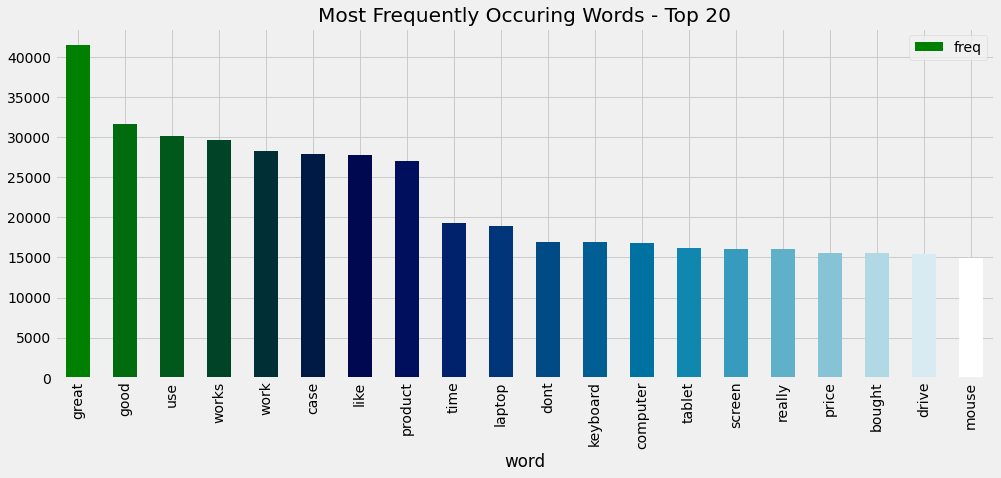

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.review_body)
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 20")
plt.show()


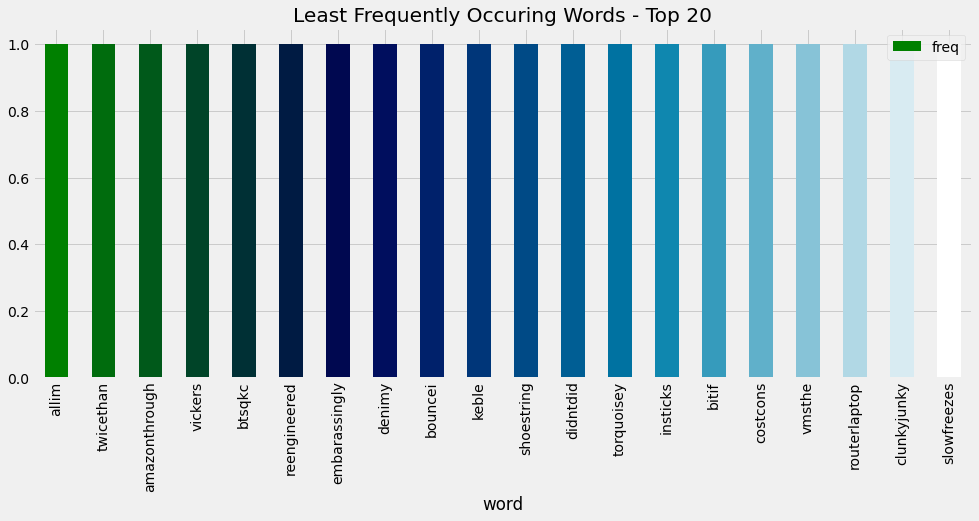

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.review_body)
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.tail(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Least Frequently Occuring Words - Top 20")
plt.show()

In [ ]:
df['review_body'].describe()

count     200002
unique    174160
top         good
freq        1759
Name: review_body, dtype: object

In [ ]:
# after reset the index dataset 
df = df.sample(frac=1).reset_index(drop=True)
df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,41199630,R10I65WZ904D6R,B006MRAVFE,338477806,Wacom Wireless Accessory Kit for Bamboo and In...,PC,5,0,0,N,Y,Five Stars,excellent,2015-08-17,1
1,US,43105308,R17Q6B4SLB37Y4,B00N4MHL80,288387799,Swees® Ultra Slim Leather Case / Cover for New...,PC,3,0,0,N,Y,Perfect!!,case protects kindle small fits purse perfect,2015-07-14,0
2,US,3200518,R2Q81GQ4NZAVOW,B00YB8MN7U,690530850,"Laptop Backpack, Evecase Lightweight Nylon Wat...",PC,5,0,0,N,Y,Great Laptop Backpack,exactly wanted perfect size laptop enough stor...,2015-08-15,1
3,US,24825569,RMX5F59PZBE55,B00PBGT58G,76847891,"Bookshelf Library Decal Vinyl Sticker, 13"" Mac...",PC,4,0,0,N,Y,but I loved the finish product,not easiest apply but loved finish product mac...,2015-08-17,1
4,US,40240259,RPECFADOD4GT,B00NWXV41G,843008787,Sentey Flow LS-4223 Foldable Headphone with De...,PC,1,0,0,N,Y,You get what you pay for...,since seemed many good reviews hopeful would w...,2015-08-25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199997,US,31884777,R2WVYPDX8UPWB3,B00NH13K8S,804909410,AmazonBasics Mini DisplayPort (Thunderbolt) to...,PC,5,1,1,N,Y,Five Stars,works great better price store,2015-08-20,1
199998,US,26034993,RCFVYH8ZAWYR6,B00T7EXKLG,393102922,ASUS G751JL 17-Inch Gaming Laptop [2014 model],PC,5,0,0,N,Y,Computer for Gaming,gift grandson happy,2015-08-23,1
199999,US,52609854,R3RJTNZ4H9LTV4,B000X2MBPC,427279545,ELPKS60 Soft Carrying Case (Projector Only),PC,5,0,0,N,Y,Works fine,works fine epson vs model extra pockets space,2015-08-17,1
200000,US,50739974,RYFSYTDE62VDC,B00EVWE5JK,535466510,Cooler Master NotePal,PC,3,7,8,N,Y,"It's a great laptop cooler, but...",videoiddcddbdefbbeadi dont know cooler but gri...,2015-07-27,0


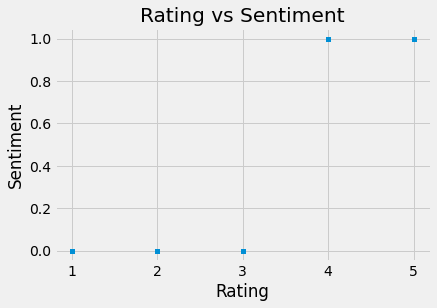

In [ ]:
import matplotlib.pyplot as plt
#rating vs sentiment
df.plot(x='star_rating', y='sentiment', kind="scatter")
plt.title("Rating vs Sentiment")
plt.xlabel("Rating")
plt.ylabel("Sentiment")
plt.show()

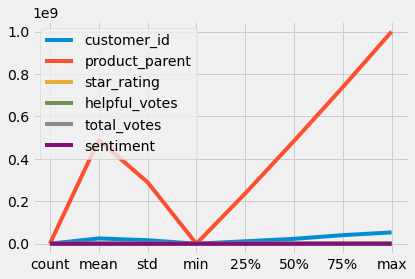

In [ ]:
# Get the columns from the dataframe
columns = list(df.describe().columns)

#Create an axis
fig, ax = plt.subplots()

# Plot each column
for column in columns:
    df.describe()[column].plot(kind='line', ax=ax, label=column)

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [ ]:
df['review_body'].unique()

array(['excellent', 'case protects kindle small fits purse perfect',
       'exactly wanted perfect size laptop enough storage cords mouse fit books folders great price well padded would recommend',
       ..., 'works fine epson vs model extra pockets space',
       'videoiddcddbdefbbeadi dont know cooler but grill slightly convex im using alienware mx tiny rubber pads feet laptop doesnt sit flat top coolers grill actually spin laptop place not huge issue annoying especially using laptops trackpadi really wanted like product manages cool laptop internal fan doesnt kick high gear ever alienware laptop youll know get extremely hot cooler pretty effective keeping temps fan fairly quiet slightly louder laptops fanoutside issues everything else right excellent price stylish light works adding builtin port hub awesome idea much appreciated laptop already limited number usb ports',
       'wanted love bag exactly looking terms bag could use travel would turn formal lap top bag work got place 

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


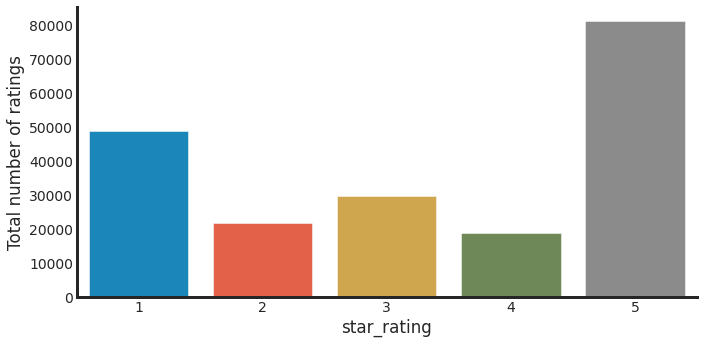

In [ ]:
with sns.axes_style('white'):
    g = sns.factorplot("star_rating", data=df, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

In [ ]:
df.groupby('product_title')['star_rating'].value_counts()

product_title                                                                                                                                                                            star_rating
$100 Costco Cash Card - No expiration date - Brand new from Costco ...                                                                                                                   1              1
                                                                                                                                                                                         5              1
$25 -- DIGITAL DOWNLOAD CARD New Silhouette SD Machine                                                                                                                                   5              1
'10 Guarantee SDHC card conversion adapter with Team MicroSDHC Card 32GB Class10 ECO package (32GB)                                                                                      1           

#### Sprint 2 (Task 2)

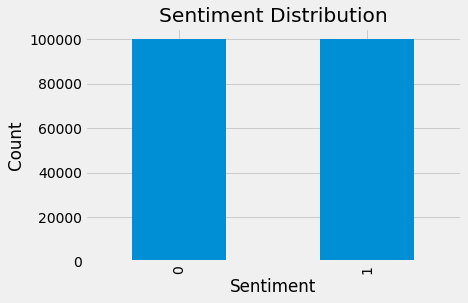

In [ ]:
import matplotlib.pyplot as plt
# create a bar graph to show sentiment distribution 
sentiment_counts = df.groupby('sentiment').count()['review_body']
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

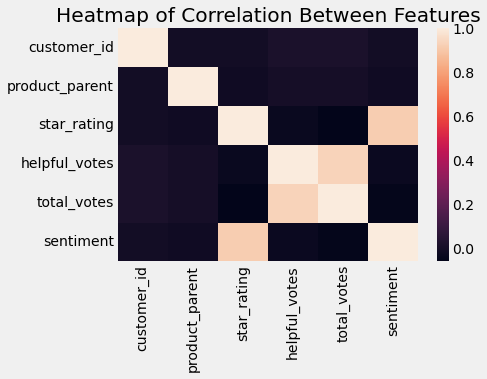

In [ ]:
# correlation between the features
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.title('Heatmap of Correlation Between Features')
plt.show()

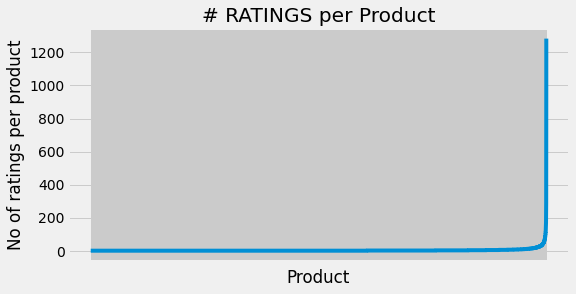

In [ ]:
no_of_ratings_per_product = df.groupby(by='product_id')['star_rating'].count().sort_values(ascending=True)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product)
plt.title('# RATINGS per Product')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()

In [ ]:
df['product_id'].value_counts()


B00OQVZDJM    1283
B00J46VVKE    1001
B00I15SB16     717
B00M55C0NS     605
B00IKPYKWG     582
              ... 
B00FFIG71I       1
B00028EK7O       1
B00VSLTWSG       1
B00B3VKL6I       1
B000RY0QFI       1
Name: product_id, Length: 59920, dtype: int64

In [ ]:
ratings_mean_count = pd.DataFrame(df.groupby('product_id')['star_rating'].mean())

In [ ]:
ratings_mean_count['rating_counts'] = pd.DataFrame(df.groupby('product_id')['star_rating'].count())

array([[<AxesSubplot:title={'center':'star_rating'}>,
        <AxesSubplot:title={'center':'rating_counts'}>]], dtype=object)

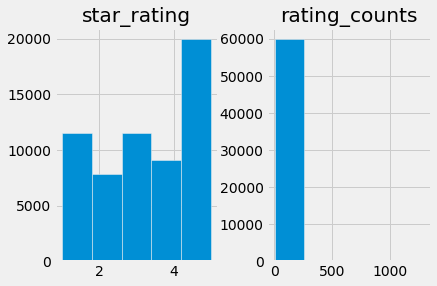

In [ ]:
ratings_mean_count.hist(bins=5)

<Figure size 576x432 with 0 Axes>

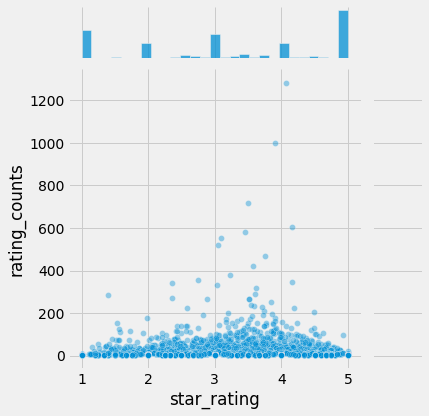

In [ ]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='star_rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

<AxesSubplot:xlabel='product_id'>

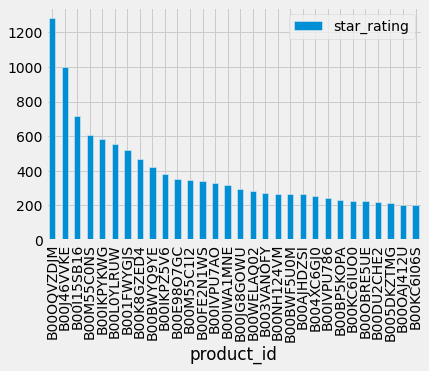

In [ ]:
popular_products = pd.DataFrame(df.groupby('product_id')['star_rating'].count())
most_popular = popular_products.sort_values('star_rating', ascending=False)
most_popular.head(30).plot(kind = "bar")

#### Sprint 2 (Task 3)

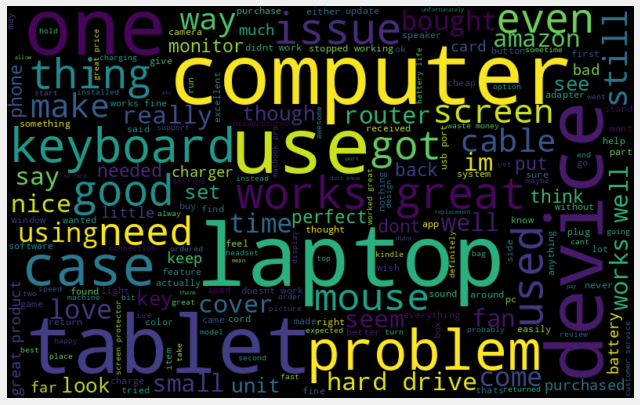

In [ ]:
# Identify Common Words/Phrases
import seaborn as sns
from wordcloud import WordCloud 
# create a word cloud to show the most common words
all_words = ' '.join([text for text in df['review_body']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
from collections import Counter

pos_words = []
neg_words = []

for review in df[df['sentiment'] == 1]['review_body']:
    for word in review.split():
        pos_words.append(word.lower())

for review in df[df['sentiment'] == 0]['review_body']:
    for word in review.split():
        neg_words.append(word.lower())

pos_counts = Counter(pos_words)
neg_counts = Counter(neg_words)

print('Most Common Positive Words:')
for word, count in pos_counts.most_common(10):
    print(word, count)

print('Most Common Negative Words:')
for word, count in neg_counts.most_common(10):
    print(word, count)

Most Common Positive Words:
great 32155
but 24750
works 20354
not 20101
good 18151
one 14963
use 13123
case 13046
well 12911
like 12901
Most Common Negative Words:
not 71782
but 48633
one 25134
work 21719
would 20059
use 17037
no 16853
get 16823
like 14878
case 14803


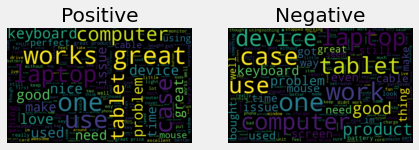

In [ ]:

# create separate dataframes for each sentiment
positive_df = df[df['sentiment'] == 1]
negative_df = df[df['sentiment'] == 0]

# create word clouds for each sentiment
positive_words = ' '.join([text for text in positive_df['review_body']])
negative_words = ' '.join([text for text in negative_df['review_body']])

wordcloud_pos = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
wordcloud_neg = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)

# plot the word clouds
plt.figure(figsize=(10, 7))
plt.subplot(131)
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.title('Positive')
plt.axis('off')

plt.subplot(132)
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.title('Negative')
plt.axis('off')


plt.show()

In [ ]:
df.product_title

0         Plemo 14-Inch Laptop Sleeve Case Waterproof Fa...
1                TP-Link OnHub AC1900 Wireless Wi-Fi Router
2         Aleratec SATA Data Cable 2.0 20in Serial ATA S...
3         Kingston Digital MobileLite G4 USB 3.0 Multi-F...
4         Lenovo TAB2 A10 - 10.1" 2-in-1 Tablet (1.5Ghz,...
                                ...                        
199997              Dragon Touch M10X 10.1-Inch 16GB Tablet
199998    HighPoint Dual-Bay Thunderbolt 10Gbps Storage ...
199999    NeuTab N7 Pro 7-Inch Tablet PC, 1.2 GHz Quad C...
200000                                    Kindle Paperwhite
200001    Transcend 64GB Class 10 SDXC High Speed Secure...
Name: product_title, Length: 200002, dtype: object

In [ ]:
# no.of reviews for particular product title
product_name = 'Kindle Paperwhite'
product_reviews = df.loc[df['product_title'] == product_name]

In [ ]:
product_reviews.count()

marketplace          1620
customer_id          1620
review_id            1620
product_id           1620
product_parent       1620
product_title        1620
product_category     1620
star_rating          1620
helpful_votes        1620
total_votes          1620
vine                 1620
verified_purchase    1620
review_headline      1620
review_body          1620
review_date          1620
sentiment            1620
dtype: int64

#### Sprint 3 (Task 1)

In [30]:
##converting text into vetors
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(max_features=1000)
X=vectorizer.fit_transform(df['review_body']).toarray()

In [31]:
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.24428645, 0.     

### Sprint 3 (Task 2)

In [32]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [34]:
from textblob import TextBlob

# Create a new column for sentiment score
def senti(x):
  if TextBlob(x).sentiment.polarity>=0.4:
     return 1
  else:
     return 0

df["sentiment_score"] = df["review_body"].apply(senti)

# Print the first 10 rows of the dataset with the sentiment score
df.head()


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment,sentiment_score
0,US,22873041,R3ARRMDEGED8RD,B00KJWQIIC,335625766,Plemo 14-Inch Laptop Sleeve Case Waterproof Fa...,PC,5,0,0,N,Y,Pleasantly surprised,surprised high quality stitching sturdiness ha...,2015-08-31,1,0
1,US,30088427,RQ28TSA020Y6J,B013ALA9LA,671157305,TP-Link OnHub AC1900 Wireless Wi-Fi Router,PC,5,24,31,N,N,OnHub is a pretty no nonsense type router that...,google employee chance use device months opini...,2015-08-31,1,0
2,US,38264512,R39NJY2YJ1JFSV,B00AQMTND2,964759214,Aleratec SATA Data Cable 2.0 20in Serial ATA S...,PC,5,0,0,N,Y,Five Stars,excellent great value job,2015-08-31,1,1
3,US,30548466,R31SR7REWNX7CF,B00KX4TORI,170101802,Kingston Digital MobileLite G4 USB 3.0 Multi-F...,PC,5,0,0,N,Y,"Good quality, works well and compact",good qualityworks well compact size,2015-08-31,1,1
4,US,49329488,R1QF6RS1PDLU18,B00TR05L9Y,778403103,"Lenovo TAB2 A10 - 10.1"" 2-in-1 Tablet (1.5Ghz,...",PC,4,1,1,N,Y,Good,not sure dont know tablet lollipop sometimes c...,2015-08-31,1,1


In [35]:
df.sentiment_score.value_counts()

0    141855
1     58147
Name: sentiment_score, dtype: int64

In [36]:
Y=df['sentiment_score']
Y

0         0
1         0
2         1
3         1
4         1
         ..
199997    0
199998    0
199999    1
200000    0
200001    0
Name: sentiment_score, Length: 200002, dtype: int64

In [28]:
Y.isnull().sum()

0

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [38]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [39]:
model.score(X_test,y_test)

0.8661188980183664

### Sprint 3 (Task3)

In [40]:
predictions=model.predict(X_test)
predictions

array([1, 0, 1, ..., 0, 0, 0])

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8661188980183664

In [43]:
model.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}

### Sprint 3 (Task 4)

In [70]:
from sklearn.model_selection import GridSearchCV
mnb=MultinomialNB()
params={
    'alpha':[1.0,5.0],
    'force_alpha':[True,False],
    'fit_prior':[True,False],
    'class_prior' : [None, [.1,.9],[.2, .8]]}
gridsearchcv=GridSearchCV(estimator=mnb,
                         cv=2,
                         param_grid=params,
                         scoring='accuracy')
gridsearchcv.fit(X,Y)

GridSearchCV(cv=2, estimator=MultinomialNB(),
             param_grid={'alpha': [1.0, 5.0],
                         'class_prior': [None, [0.1, 0.9], [0.2, 0.8]],
                         'fit_prior': [True, False],
                         'force_alpha': [True, False]},
             scoring='accuracy')

In [71]:
# best parameters for the model
gridsearchcv.best_params_

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}

In [72]:
# accuracy score for the best fit parameters of the model
gridsearchcv.best_score_

0.8406765932340676

In [73]:
# After changing the parameters againing training the model
from sklearn.naive_bayes import MultinomialNB

params = {'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}

model = MultinomialNB(**params)

model.fit(X_train,y_train)

MultinomialNB(force_alpha=True)

In [74]:
# prediction and  accuracy after changing the parameters
predictions=model.predict(X_test)
accuracy_score(y_test,predictions)

0.8661188980183664